In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/Users/sinsakuokazaki/Project/pred-future-sales/\
input/competitive-data-science-predict-future-sales/sales_train.csv')

train_total = pd.read_csv('/Users/sinsakuokazaki/Project/pred-future-sales/\
input/competitive-data-science-predict-future-sales/train_total.csv')

test = pd.read_csv('/Users/sinsakuokazaki/Project/pred-future-sales/\
input/competitive-data-science-predict-future-sales/test.csv')

In [71]:
test.shop_id.value_counts()

59    5100
16    5100
28    5100
26    5100
25    5100
24    5100
22    5100
21    5100
19    5100
18    5100
15    5100
58    5100
14    5100
12    5100
10    5100
7     5100
6     5100
5     5100
4     5100
3     5100
31    5100
34    5100
35    5100
36    5100
57    5100
56    5100
55    5100
53    5100
52    5100
50    5100
49    5100
48    5100
47    5100
46    5100
45    5100
44    5100
42    5100
41    5100
39    5100
38    5100
37    5100
2     5100
Name: shop_id, dtype: int64

In [6]:
test.item_id.value_counts()

2047     42
19744    42
15406    42
13359    42
3240     42
1193     42
7338     42
11436    42
9389     42
21795    42
13231    42
13743    42
3624     42
1577     42
7722     42
5675     42
11948    42
16046    42
19488    42
15278    42
10029    42
4395     42
18464    42
2088     42
6186     42
8237     42
20643    42
8365     42
12463    42
12591    42
         ..
1492     42
11985    42
8528     42
16083    42
3797     42
7895     42
18140    42
20189    42
10064    42
16211    42
7255     42
13394    42
11345    42
13266    42
20830    42
8656     42
14803    42
6615     42
20958    42
12882    42
14931    42
4694     42
6743     42
16988    42
19037    42
21086    42
21214    42
17244    42
21342    42
2049     42
Name: item_id, Length: 5100, dtype: int64

In [72]:
test.ID.value_counts()

2047      1
105062    1
64074     1
57929     1
59976     1
37447     1
39494     1
33349     1
35396     1
45635     1
47682     1
41537     1
43584     1
213565    1
201271    1
203318    1
197173    1
199220    1
209459    1
211506    1
205361    1
207408    1
152095    1
154142    1
147997    1
62027     1
51788     1
49741     1
31322     1
100964    1
         ..
179453    1
177404    1
167163    1
122257    1
118163    1
3499      1
21920     1
1450      1
7593      1
5544      1
28071     1
26022     1
32165     1
30116     1
19875     1
17826     1
23969     1
109983    1
128404    1
107934    1
114077    1
112028    1
101787    1
99738     1
105881    1
103832    1
126359    1
124310    1
130453    1
0         1
Name: ID, Length: 214200, dtype: int64

In [7]:
train_total.head()

,shop_id,item_id,total_sales-1-2013,total_sales-2-2013,total_sales-3-2013,total_sales-4-2013,total_sales-5-2013,total_sales-6-2013,total_sales-7-2013,total_sales-8-2013,...,total_sales-7-2015,total_sales-8-2015,total_sales-9-2015,total_sales-10-2015,total_sales-11-2015,total_sales-12-2015,item_name,item_category_id,item_category_name,shop_name
0,0,32,1326.0,2210.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1+1,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
1,0,33,1041.0,1041.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1+1 (BD),37,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран"
2,0,35,247.0,3458.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
3,0,43,221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
4,0,51,257.0,381.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,"!Якутск Орджоникидзе, 56 фран"


In [8]:
t_1_2013 = train_total.loc[train_total['total_sales-1-2013'].notnull()][['shop_id', 'item_id','total_sales-1-2013']]

In [11]:
t_1_2013["shop_id"].value_counts()

In [12]:
t_1_2013["item_id"].value_counts()

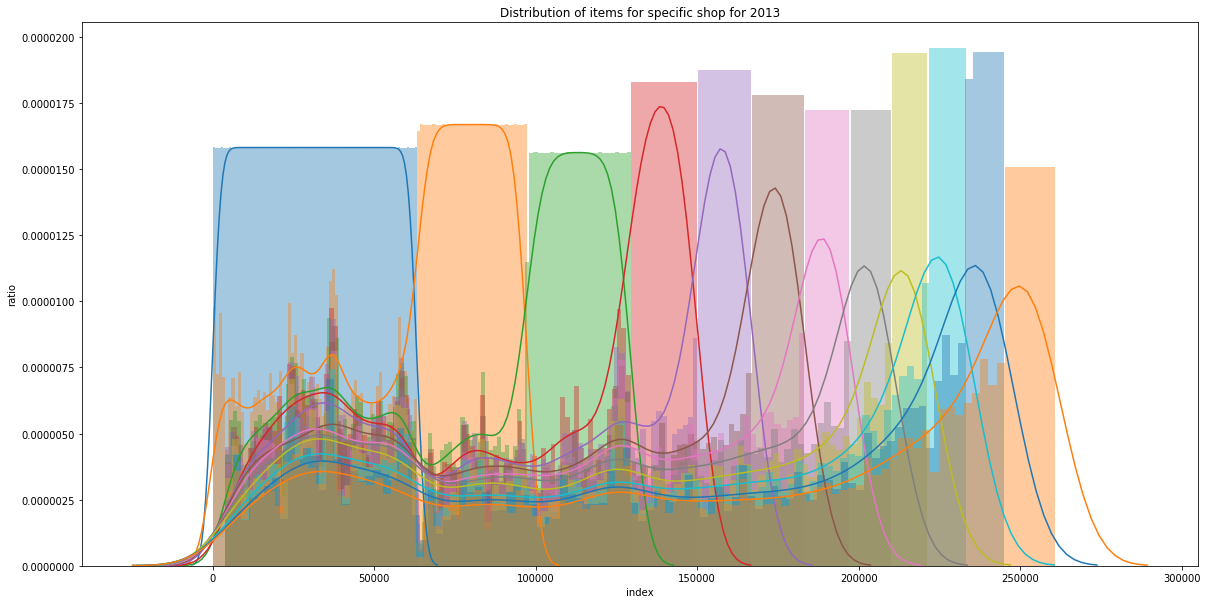

In [49]:
f, axes = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
plt.xlabel("index")
plt.ylabel("ratio")
plt.title("Distribution of items for specific shop for 2013")
monthes = train_total.columns.drop(['shop_id', 'item_id'])[:12]
for month in monthes:
    i = train_total.loc[train_total[month].notnull()].index
    sns.distplot(i, bins=100)

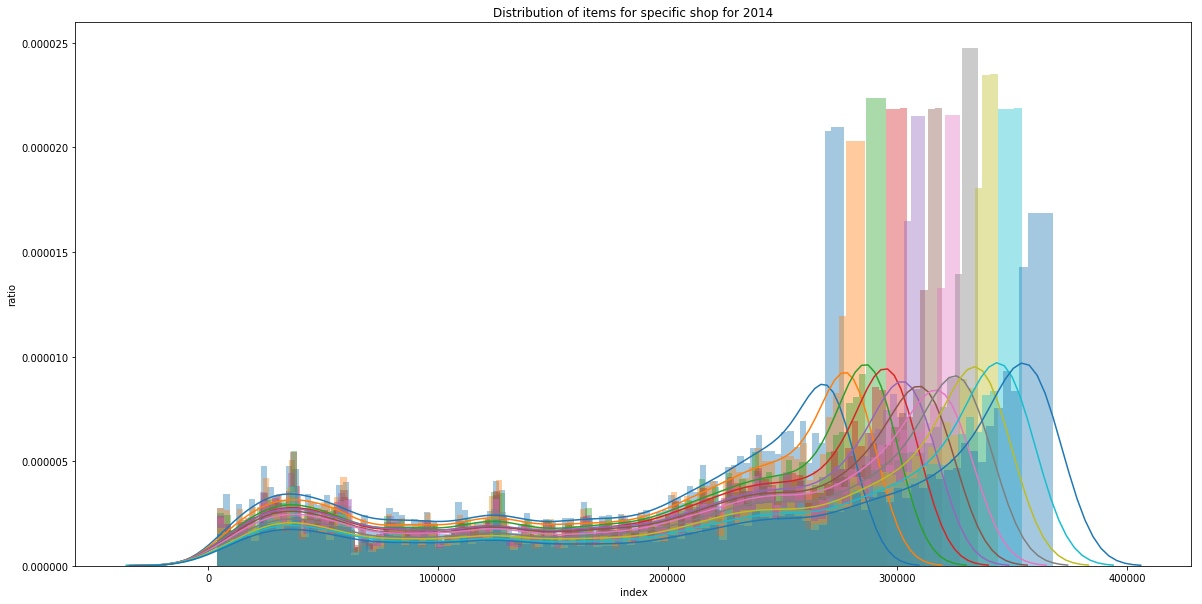

In [50]:
f, axes = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
plt.xlabel("index")
plt.ylabel("ratio")
plt.title("Distribution of items for specific shop for 2014")
monthes = train_total.columns.drop(['shop_id', 'item_id'])[12:24]
for month in monthes:
    i = train_total.loc[train_total[month].notnull()].index
    sns.distplot(i, bins=100)

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


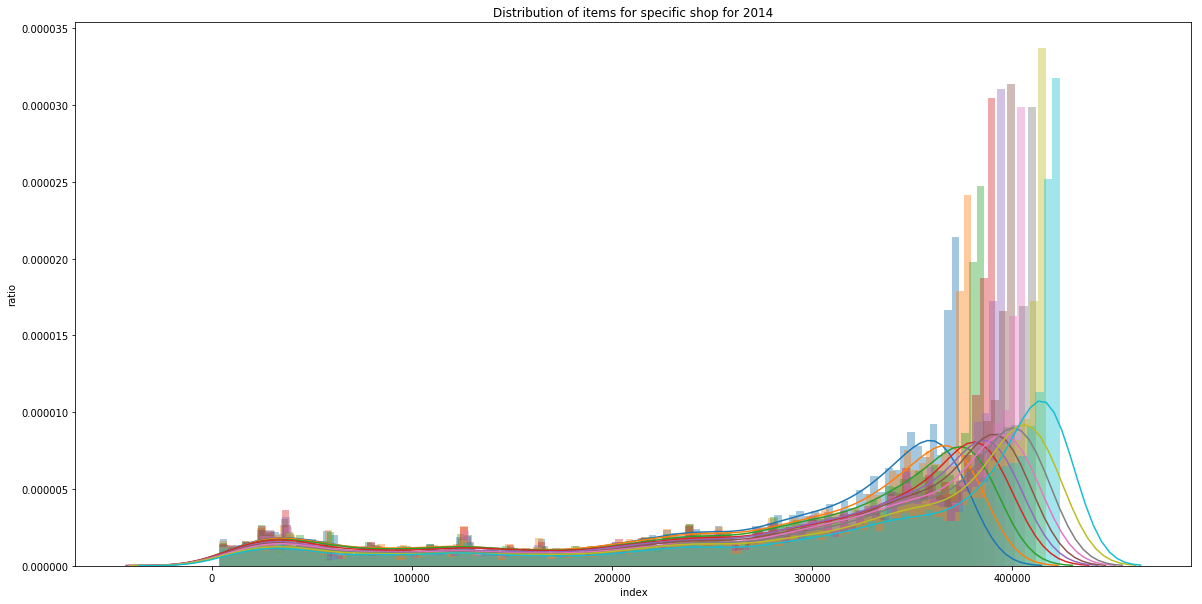

In [62]:
f, axes = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
plt.xlabel("index")
plt.ylabel("ratio")
plt.title("Distribution of items for specific shop for 2015")
monthes = train_total.columns.drop(['shop_id', 'item_id'])[24:36]
for month in monthes:
    i = train_total.loc[train_total[month].notnull()].index
    sns.distplot(i, bins=100)

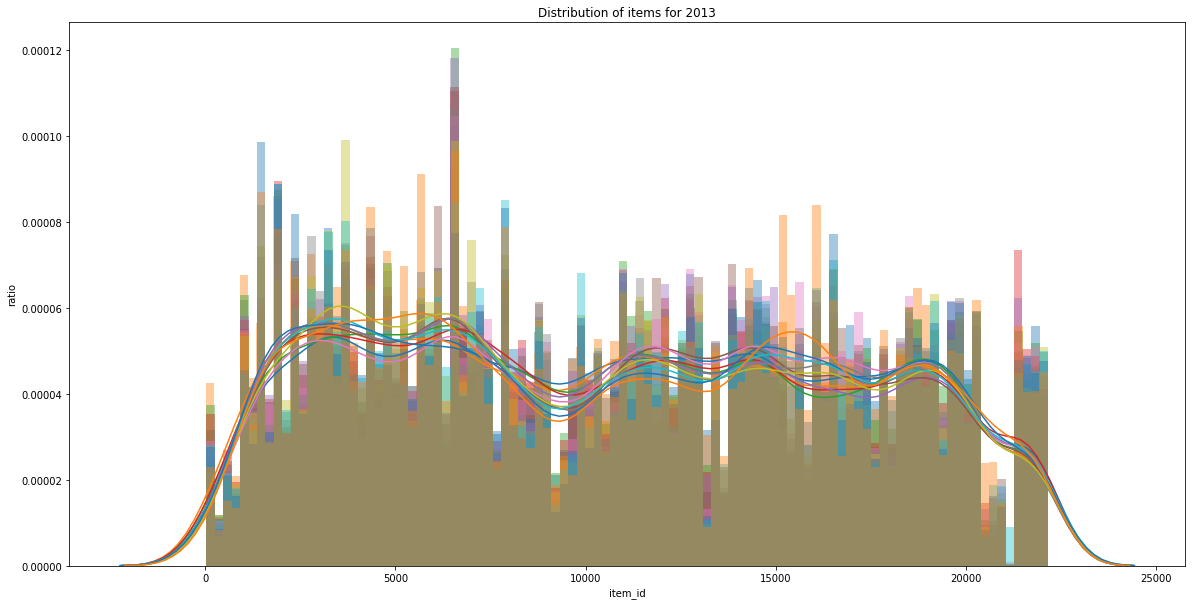

In [66]:
f, axes = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
plt.xlabel("item_id")
plt.ylabel("ratio")
plt.title("Distribution of items for 2013")
monthes = train_total.columns.drop(['shop_id', 'item_id'])[:12]
for month in monthes:
    i = train_total.loc[train_total[month].notnull()]['item_id']
    sns.distplot(i, bins=100)

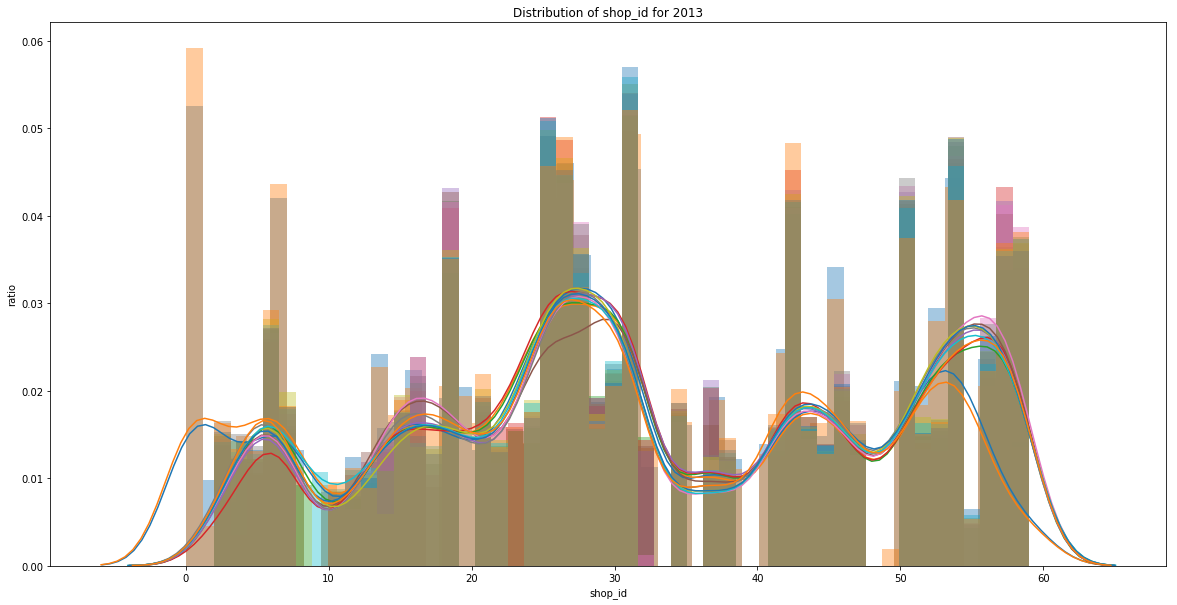

In [69]:
f, axes = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
plt.xlabel("shop_id")
plt.ylabel("ratio")
plt.title("Distribution of shop_id for 2013")
monthes = train_total.columns.drop(['shop_id', 'item_id'])[:12]
for month in monthes:
    i = train_total.loc[train_total[month].notnull()]['shop_id']
    sns.distplot(i, bins=50)

In [73]:
items_categories = pd.read_csv('/Users/sinsakuokazaki/Project/pred-future-sales/\
input/competitive-data-science-predict-future-sales/items_categories.csv')

In [74]:
items_categories.head()

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD


In [86]:
train_total["combination_id"] = train_total.apply(lambda x: (x['shop_id'], x['item_id']), axis=1)

In [90]:
test["combination_id"] = test.apply(lambda x: (x['shop_id'], x['item_id']), axis=1)

In [143]:
ids_data_dict = {}
for d, n in zip([train_total, test], ["train_total", "test"]):
    num_ids_dict = {}
    for c in ["shop_id", "item_id", "combination_id", "item_category_id"]:
        num_ids_dict[c] = d[c].unique().shape[0]
    ids_data_dict[n] = num_ids_dict
    
new_obs_dict = {}
for c in ["shop_id", "item_id", "combination_id", "item_category_id"]:
    if c == "combination_id":
        new_obs_dict[c] = test["combination_id"].isin(train_total['combination_id']).sum()
    else:
        new_obs_dict[c] = np.isin(test[c].unique(), train_total[c].unique()).sum()
ids_data_dict["new_obs"] = new_obs_dict  

In [144]:
ids_data_dict["train_total"]

{'shop_id': 60,
 'item_id': 21807,
 'combination_id': 424124,
 'item_category_id': 84}

In [145]:
ids_data_dict['test']

{'shop_id': 42,
 'item_id': 5100,
 'combination_id': 214200,
 'item_category_id': 62}

In [146]:
ids_data_dict["new_obs"]

{'shop_id': 42,
 'item_id': 4737,
 'combination_id': 111404,
 'item_category_id': 62}

In [154]:
#label row where the ID is in the test set
train_total["in_test"] = train_total["combination_id"].isin(test['combination_id'])
test["in_train"] = test["combination_id"].isin(train_total['combination_id'])

In [157]:
train_total.to_csv('/Users/sinsakuokazaki/Project/pred-future-sales/\
input/competitive-data-science-predict-future-sales/train_total.csv', index = False)
test.to_csv('/Users/sinsakuokazaki/Project/pred-future-sales/\
input/competitive-data-science-predict-future-sales/test.csv', index = False)